# Test of the POT library example
https://pythonot.github.io/auto_examples/backends/plot_dual_ot_pytorch.html#sphx-glr-auto-examples-backends-plot-dual-ot-pytorch-py

In [1]:

import numpy as np
import matplotlib.pyplot as pl
import torch
import ot
import ot.plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Enable interactive mode
%matplotlib ipympl

In [3]:
torch.manual_seed(1)

n_source_samples = 100
n_target_samples = 100
theta = 2 * np.pi / 20
noise_level = 0.1

Xs, ys = ot.datasets.make_data_classif(
    'gaussrot', n_source_samples, nz=noise_level)
Xt, yt = ot.datasets.make_data_classif(
    'gaussrot', n_target_samples, theta=theta, nz=noise_level)

# one of the target mode changes its variance (no linear mapping)
Xt[yt == 2] *= 3
Xt = Xt + 4

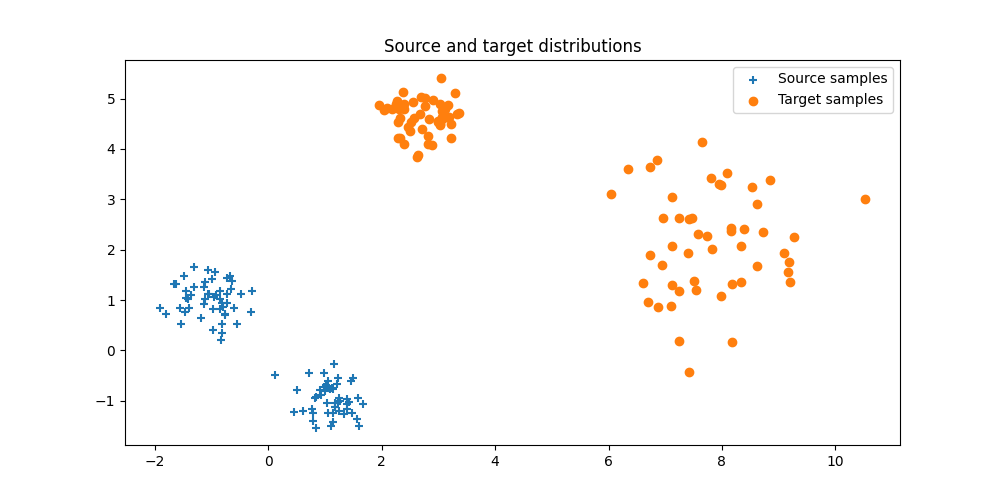

In [4]:
pl.figure(1, (10, 5))
pl.clf()
pl.scatter(Xs[:, 0], Xs[:, 1], marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], marker='o', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')
pl.show()

In [8]:
xt.shape

torch.Size([100, 2])

Iter:   0, loss=0.20204949002247366
Iter:  10, loss=-19.497235758635817
Iter:  20, loss=-31.340360644334254
Iter:  30, loss=-35.730389639655776
Iter:  40, loss=-38.852033890885146
Iter:  50, loss=-40.50196353096245
Iter:  60, loss=-41.0430118093615
Iter:  70, loss=-41.3565893444894
Iter:  80, loss=-41.516076508379534
Iter:  90, loss=-41.588557869181635
Iter: 100, loss=-41.620625048161784
Iter: 110, loss=-41.63307379254491
Iter: 120, loss=-41.639468005782746
Iter: 130, loss=-41.643665900851666
Iter: 140, loss=-41.64688313793387
Iter: 150, loss=-41.64958316988738
Iter: 160, loss=-41.65207784756942
Iter: 170, loss=-41.654448207442506
Iter: 180, loss=-41.65672605361516
Iter: 190, loss=-41.658905317297936


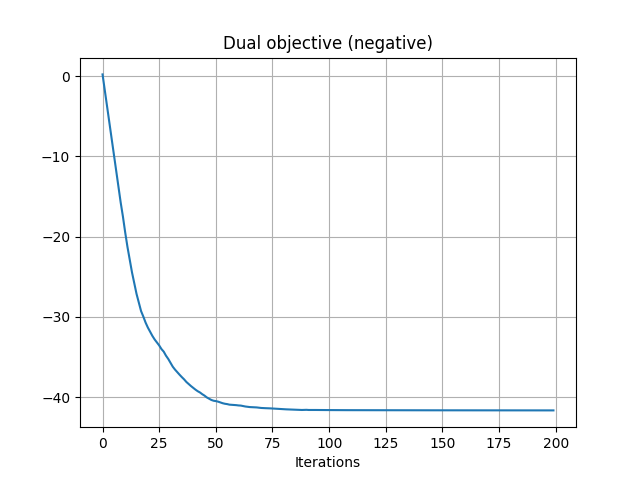

In [7]:
xs = torch.tensor(Xs)
xt = torch.tensor(Xt)
u = torch.randn(n_source_samples, requires_grad=True)
v = torch.randn(n_source_samples, requires_grad=True)

reg = 0.5

optimizer = torch.optim.Adam([u, v], lr=1)

# number of iteration
n_iter = 200


losses = []

for i in range(n_iter):

    # generate noise samples

    # minus because we maximize te dual loss
    loss = -ot.stochastic.loss_dual_entropic(u, v, xs, xt, reg=reg)
    losses.append(float(loss.detach()))

    if i % 10 == 0:
        print("Iter: {:3d}, loss={}".format(i, losses[-1]))

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


pl.figure(2)
pl.plot(losses)
pl.grid()
pl.title('Dual objective (negative)')
pl.xlabel("Iterations")

Ge = ot.stochastic.plan_dual_entropic(u, v, xs, xt, reg=reg)


Text(0.5, 1.0, 'Source and target distributions')

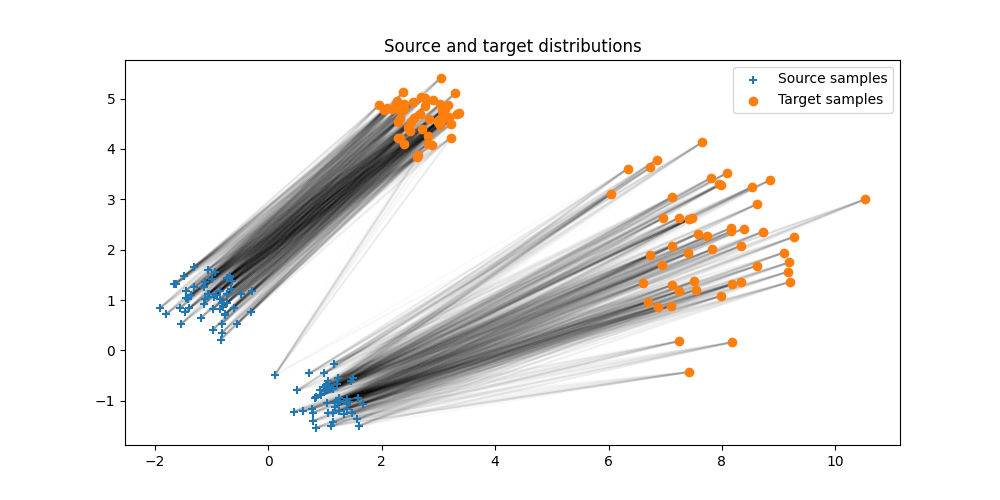

In [9]:
pl.figure(3, (10, 5))
pl.clf()
ot.plot.plot2D_samples_mat(Xs, Xt, Ge.detach().numpy(), alpha=0.1)
pl.scatter(Xs[:, 0], Xs[:, 1], marker='+', label='Source samples', zorder=2)
pl.scatter(Xt[:, 0], Xt[:, 1], marker='o', label='Target samples', zorder=2)
pl.legend(loc=0)
pl.title('Source and target distributions')

In [10]:
# Now load bitmap image and turn its points into target points

In [11]:
! pwd

/home/dimakot55/workspace/gaussian-splatting/notebooks


In [20]:
from PIL import Image
image = Image.open('/home/dimakot55/workspace/gaussian-splatting/notebooks/cat_doodle.jpeg')  # Replace 'your_image.bmp' with the path to your image

# Convert the image to a NumPy array
image_array = np.array(image)[...,0] < 0.5

# Get the shape of the image (height and width)
height, width = image_array.shape

# Create an empty list to store the points
points = []

# Iterate through the image array to find points with values greater than 0
for y in range(height):
    for x in range(width):
        if image_array[y, x] > 0:
            # Normalize the coordinates to the [0, 1] range
            normalized_x = x / width
            normalized_y = 1. - y / height
            points.append((normalized_x, normalized_y))


In [21]:
points = np.array(points)

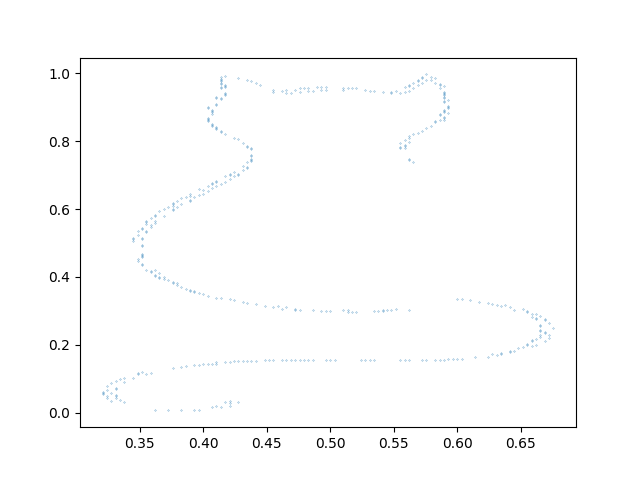

In [22]:
pl.figure()
pl.scatter(points[:,0], points[:,1], s=0.05)
pl.show()

In [23]:
len(points)

428

In [24]:
import random

In [26]:
points

array([[0.57586207, 0.99655172],
       [0.41724138, 0.99310345],
       [0.4137931 , 0.98965517],
       [0.57241379, 0.98965517],
       [0.57931034, 0.98965517],
       [0.42758621, 0.9862069 ],
       [0.57241379, 0.9862069 ],
       [0.58275862, 0.9862069 ],
       [0.4137931 , 0.98275862],
       [0.4137931 , 0.97931034],
       [0.43448276, 0.97931034],
       [0.56896552, 0.97931034],
       [0.57586207, 0.97931034],
       [0.57931034, 0.97931034],
       [0.4137931 , 0.97586207],
       [0.43793103, 0.97586207],
       [0.56896552, 0.97586207],
       [0.4137931 , 0.97241379],
       [0.44137931, 0.97241379],
       [0.56551724, 0.97241379],
       [0.57241379, 0.97241379],
       [0.58275862, 0.97241379],
       [0.4137931 , 0.96896552],
       [0.5862069 , 0.96896552],
       [0.41724138, 0.96551724],
       [0.44482759, 0.96551724],
       [0.56206897, 0.96551724],
       [0.56896552, 0.96551724],
       [0.5862069 , 0.96551724],
       [0.41724138, 0.96206897],
       [0.

In [27]:
sampled_indices = np.random.choice(len(points), 100, replace=False)
sampled_points = points[sampled_indices]

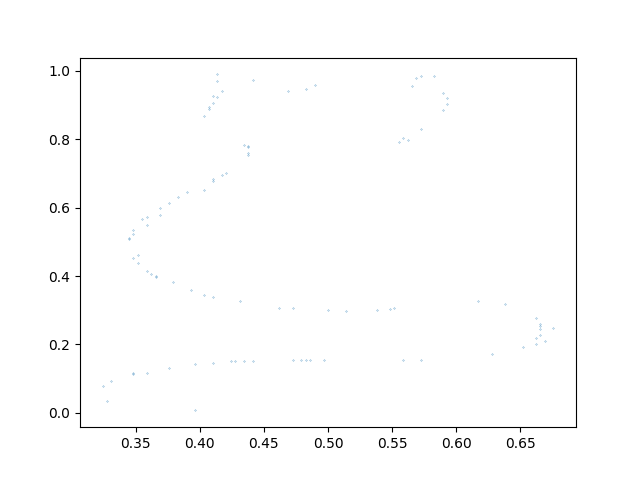

In [28]:
pl.figure()
pl.scatter(sampled_points[:,0], sampled_points[:,1], s=0.05)
pl.show()

In [38]:
pl.close()

In [53]:
Xt = sampled_points
xs = torch.tensor(Xs)
xt = torch.tensor(Xt)
u = torch.randn(len(xs), requires_grad=True)
v = torch.randn(len(xt), requires_grad=True)

reg = 0.2

optimizer = torch.optim.Adam([u, v], lr=1)

# number of iteration
n_iter = 200


losses = []

for i in range(n_iter):

    # generate noise samples

    # minus because we maximize te dual loss
    loss = -ot.stochastic.loss_dual_entropic(u, v, xs, xt, reg=reg)
    losses.append(float(loss.detach()))

    if i % 10 == 0:
        print("Iter: {:3d}, loss={}".format(i, losses[-1]))

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


pl.figure(2)
pl.plot(losses)
pl.grid()
pl.title('Dual objective (negative)')
pl.xlabel("Iterations")

Ge = ot.stochastic.plan_dual_entropic(u, v, xs, xt, reg=reg)


Iter:   0, loss=1280.533713021927
Iter:  10, loss=1.3835643105425839
Iter:  20, loss=1.707878834224511
Iter:  30, loss=1.3138336160399107
Iter:  40, loss=0.8706270541596801
Iter:  50, loss=0.5215875174506244
Iter:  60, loss=0.1817051448401807
Iter:  70, loss=-0.06749328591797632
Iter:  80, loss=-0.2883778417087991
Iter:  90, loss=-0.4489072969538842
Iter: 100, loss=-0.5824342702409365
Iter: 110, loss=-0.6960239600406672
Iter: 120, loss=-0.7844292818998988
Iter: 130, loss=-0.8668558786719253
Iter: 140, loss=-0.944128034570916
Iter: 150, loss=-1.0043968356755588
Iter: 160, loss=-1.0555707902227784
Iter: 170, loss=-1.1053018553624665
Iter: 180, loss=-1.152590432913667
Iter: 190, loss=-1.195658854731482


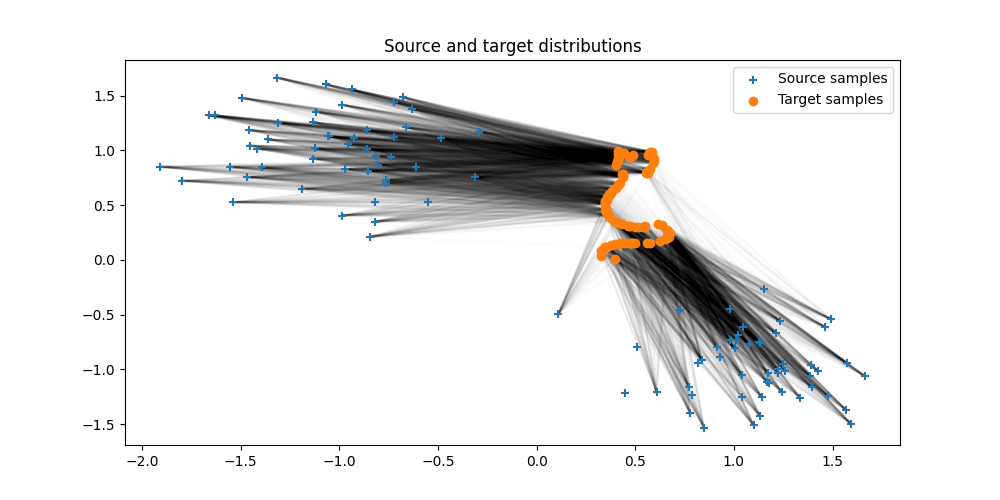

In [54]:
pl.figure(3, (10, 5))
pl.clf()
ot.plot.plot2D_samples_mat(Xs, Xt, Ge.detach().numpy(), alpha=0.1)
pl.scatter(Xs[:, 0], Xs[:, 1], marker='+', label='Source samples', zorder=2)
pl.scatter(Xt[:, 0], Xt[:, 1], marker='o', label='Target samples', zorder=2)
pl.legend(loc=0)
pl.title('Source and target distributions')
pl.show()
#pl.close()

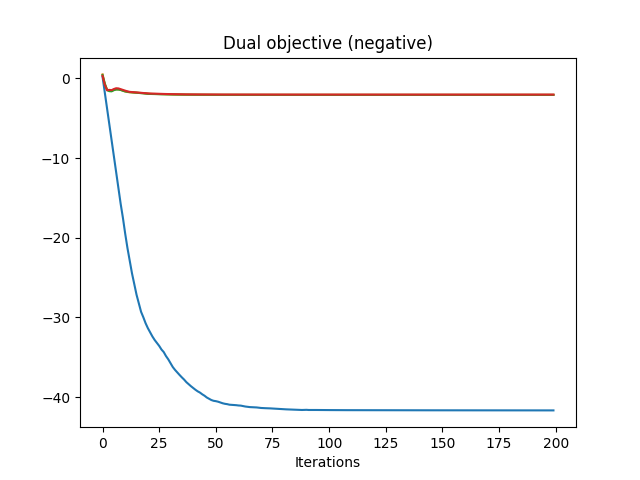

In [43]:
pl.show()